In [1]:
library(tidyverse)
library(magrittr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
samples <-
    read_tsv("../tests/cadd/clean_data/all_samples.tsv") %>%
    filter(Altai == 2)

Parsed with column specification:
cols(
  .default = col_integer(),
  ref = col_character(),
  alt = col_character()
)
See spec(...) for full column specifications.


In [3]:
annots <-
    read_tsv("../tests/cadd/clean_data/annotations.tsv") %>% 
    inner_join(samples, by=c("Chrom"="chrom", "Pos"="pos"))

Parsed with column specification:
cols(
  .default = col_double(),
  Chrom = col_integer(),
  Pos = col_integer(),
  Ref = col_character(),
  Anc = col_character(),
  Alt = col_character(),
  Type = col_character(),
  Length = col_integer(),
  isTv = col_logical(),
  isDerived = col_logical(),
  AnnoType = col_character(),
  Consequence = col_character(),
  ConsScore = col_integer(),
  ConsDetail = col_character(),
  mapAbility35bp = col_integer(),
  bStatistic = col_integer(),
  mutIndex = col_integer(),
  `mirSVR-Aln` = col_integer(),
  targetScan = col_character(),
  EncOCC = col_integer(),
  Segway = col_character()
  # ... with 26 more columns
)
See spec(...) for full column specifications.
Warning message:
“673 parsing failures.
 row            col               expected  actual
2136 mapAbility35bp no trailing characters .5     
4607 mapAbility35bp no trailing characters .333333
5028 mapAbility35bp no trailing characters .5     
5379 mapAbility35bp no trailing characters .5     


In [4]:
colnames(annots)

[1] "Chrom"           "Pos"             "Ref"             "Anc"            
  [5] "Alt"             "Type"            "Length"          "isTv"           
  [9] "isDerived"       "AnnoType"        "Consequence"     "ConsScore"      
 [13] "ConsDetail"      "GC"              "CpG"             "mapAbility20bp" 
 [17] "mapAbility35bp"  "scoreSegDup"     "priPhCons"       "mamPhCons"      
 [21] "verPhCons"       "priPhyloP"       "mamPhyloP"       "verPhyloP"      
 [25] "GerpN"           "GerpS"           "GerpRS"          "GerpRSpval"     
 [29] "bStatistic"      "mutIndex"        "dnaHelT"         "dnaMGW"         
 [33] "dnaProT"         "dnaRoll"         "mirSVR-Score"    "mirSVR-E"       
 [37] "mirSVR-Aln"      "targetScan"      "fitCons"         "cHmmTssA"       
 [41] "cHmmTssAFlnk"    "cHmmTxFlnk"      "cHmmTx"          "cHmmTxWk"       
 [45] "cHmmEnhG"        "cHmmEnh"         "cHmmZnfRpts"     "cHmmHet"        
 [49] "cHmmTssBiv"      "cHmmBivFlnk"     "cHmmEnhBiv"      "cHmmReprPC"     
 [53] "cHmmReprPCWk"    "cHmmQuies"       "EncExp"          "EncH3K27Ac"     
 [57] "EncH3K4Me1"      "EncH3K4Me3"      "EncNucleo"       "EncOCC"         
 [61] "EncOCCombPVal"   "EncOCDNasePVal"  "EncOCFairePVal"  "EncOCpolIIPVal" 
 [65] "EncOCctcfPVal"   "EncOCmycPVal"    "EncOCDNaseSig"   "EncOCFaireSig"  
 [69] "EncOCpolIISig"   "EncOCctcfSig"    "EncOCmycSig"     "Segway"         
 [73] "tOverlapMotifs"  "motifDist"       "motifECount"     "motifEName"     
 [77] "motifEHIPos"     "motifEScoreChng" "TFBS"            "TFBSPeaks"      
 [81] "TFBSPeaksMax"    "isKnownVariant"  "ESP_AF"          "ESP_AFR"        
 [85] "ESP_EUR"         "TG_AF"           "TG_ASN"          "TG_AMR"         
 [89] "TG_AFR"          "TG_EUR"          "minDistTSS"      "minDistTSE"     
 [93] "GeneID"          "FeatureID"       "CCDS"            "GeneName"       
 [97] "cDNApos"         "relcDNApos"      "CDSpos"          "relCDSpos"      
[101] "protPos"         "relProtPos"      "Domain"          "Dst2Splice"     
[105] "Dst2SplType"     "Exon"            "Intron"          "oAA"            
[109] "nAA"             "Grantham"        "PolyPhenCat"     "PolyPhenVal"    
[113] "SIFTcat"         "SIFTval"         "RawScore"        "PHRED"          
[117] "ref"             "alt"             "AG2"             "AfontovaGora3"  
[121] "Continenza"      "Vestonice13"     "Vestonice15"     "Vestonice16"    
[125] "Vestonice43"     "ElMiron"         "aurig"           "KO1"            
[129] "I0061"           "Kostenki12"      "Kostenki14"      "LaBrana1"       
[133] "Loschbour"       "MA1"             "Motala12"        "Muierii"        
[137] "Oase1_d"         "Ostuni1"         "Ostuni2"         "Pavlov1"        
[141] "Stuttgart"       "Ust_Ishim"       "Villabruna"      "Bichon"         
[145] "KK1"             "SATP"            "Altai"           "Vindija"        
[149] "Denisovan"

In [47]:
options(repr.plot.width=8, repr.plot.height=5)

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 387302 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 387302 rows containing missing values (geom_point).”

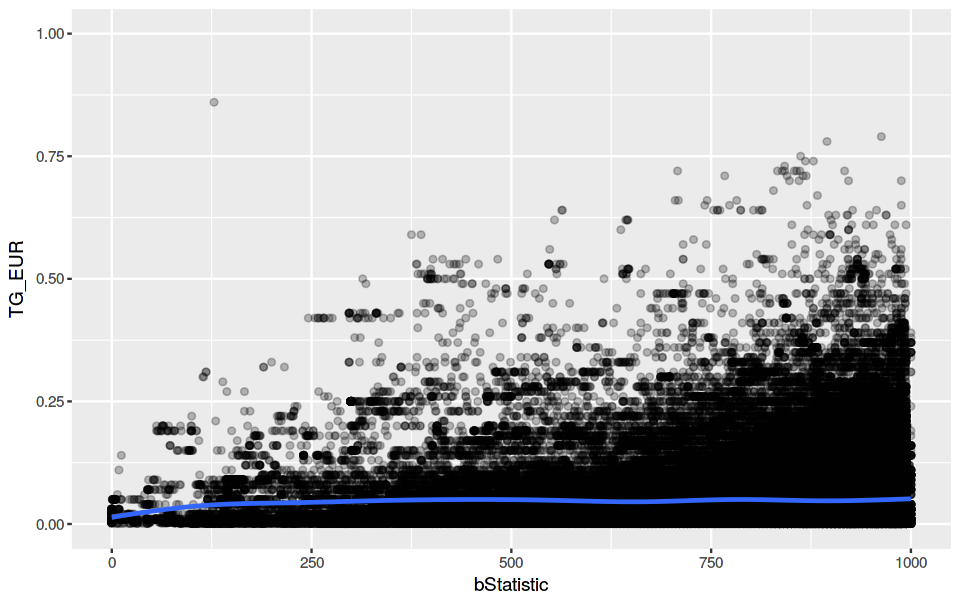

In [48]:
ggplot(annots, aes(bStatistic, TG_EUR)) +
    geom_point(alpha=0.25) +
    geom_smooth() +
    ylim(0, 1)

In [49]:
n_bins <- 20

[1] 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70
[16] 0.75 0.80 0.85 0.90 0.95 1.00

In [ ]:
mutate(annots, bStatistic_bin=quantile(bStatistic, seq(0, 1, 1 / n_bins)))

Warning message:
“Removed 387250 rows containing non-finite values (stat_bin).”

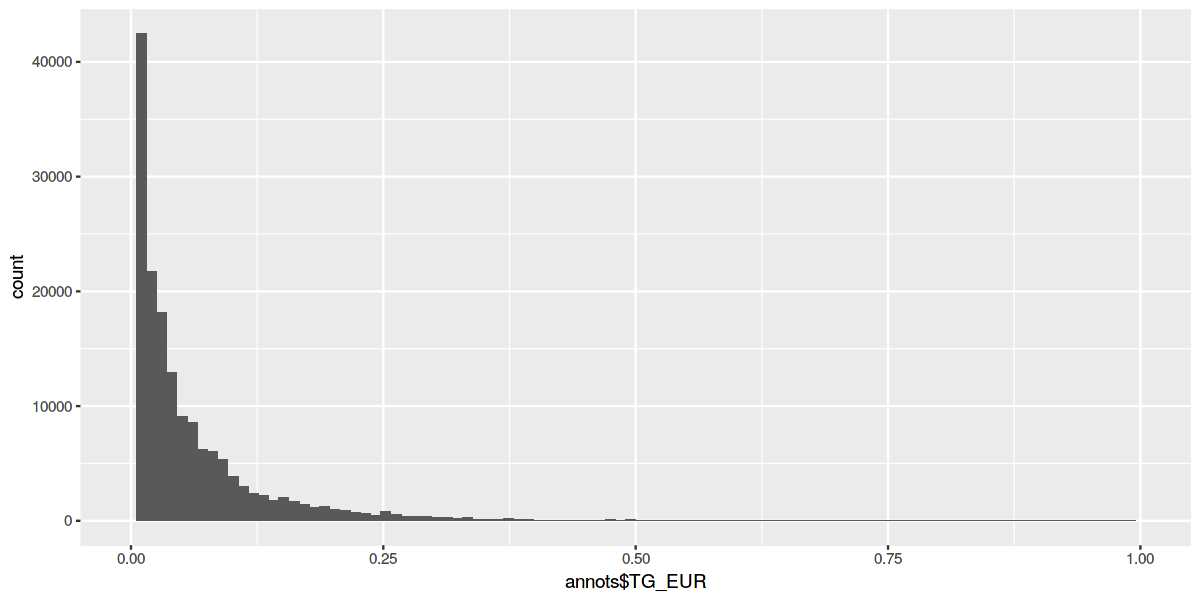

In [16]:
qplot(annots$TG_EUR, bins=100, xlim=c(0, 1))

In [46]:
gather(annots, TG_EUR, TG_ASN) %>% head

ERROR: Error: Each variable must have a unique name.
Problem variables: 'TG_EUR', 'TG_ASN'


In [25]:
filter(annots, TG_EUR > 0.8) %>% select()

Chrom,Pos,Ref,Anc,Alt,Type,Length,isTv,isDerived,AnnoType,⋯,Pavlov1,Stuttgart,Ust_Ishim,Villabruna,Bichon,KK1,SATP,Altai,Vindija,Denisovan
9,125719923,C,C,G,SNV,0,TRUE,TRUE,Transcript,⋯,9,2,0,9,2,0,2,2,2,0
